# 02_jacobi_convergence_analysis

Write a Python program that simulates and analyzes the convergence behavior of an iterative linear solver.

1. Implement a Jacobi iterative solver to solve a small, diagonally dominant linear system ( A x = b ).
2. Record the residual norm ( r_k = | b - A x_k |_2 ) at each iteration to track the convergence history.
3. Generate a synthetic exponential decay curve representing ideal convergence and compare it with the actual solver residuals.
4. Plot both convergence histories on a semilogarithmic scale.
5. Compute and report the average convergence rate based on the residual data.


Converged after 15 iterations.
Maximum iterations reached without full convergence.


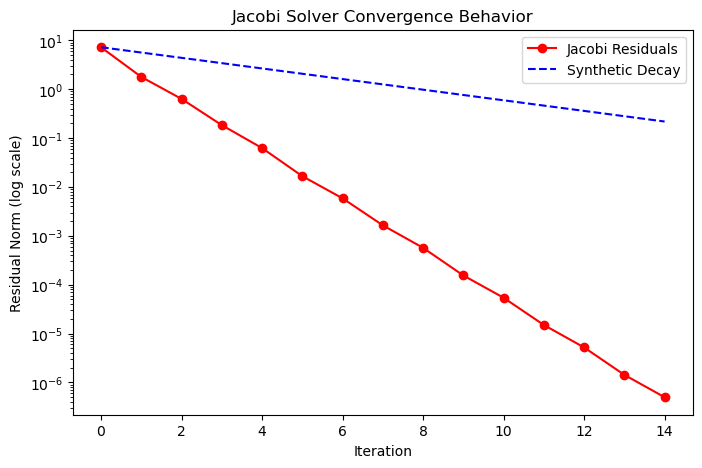

Final approximate solution:
 [4.83606521 4.34426204 2.54098341 4.18032775]

Final residual norm: 4.997445013762115e-07
Average convergence rate: 0.3105


In [10]:
import numpy as np
from numpy import array, zeros, diag, diagflat, dot 
import matplotlib.pyplot as plt

# Sample Test System which is stable and solution is known
A = np.array([[4, -1, 0, 0],
            [-1, 4, -1, 0],
            [0, -1, 4, 1],
            [0, 0, -1, 3]])

b = np.array([15, 10, 10, 10])

def jacobi(A, b, n, x=None):
    # Initial guess
    if x is None:
        x = zeros(len(A[0]))
    
    D = diag(A)
    R = A - diagflat(D)
    res = []
    tol = 10**(-6)

    for i in range(n):
        x_new = (b - np.dot(R,x)) / D
        r = b - np.dot(A,x_new)
        res.append(np.linalg.norm(r))

        if np.linalg.norm(r) < tol:
            print(f"Converged after {i+1} iterations.")
            break

        x = x_new
    print("Maximum iterations reached without full convergence.")
    return x, res

x, res = jacobi(A, b, 10000)

# Synthetic residual
k = np.arange(len(res))
res_emp = res[0] * np.exp(-0.25 * k)

# convergence Rate

ratios = []
for i in range(1, len(res)):
    ratio = res[i] / res[i-1]
    ratios.append(ratio)

conv_rate = sum(ratios)/len(ratios)

    

plt.figure(figsize=(8,5))
plt.semilogy(k, res, 'r-o', label='Jacobi Residuals')
plt.semilogy(k, res_emp, 'b--', label='Synthetic Decay')
plt.xlabel("Iteration")
plt.ylabel("Residual Norm (log scale)")
plt.title("Jacobi Solver Convergence Behavior")
plt.legend()
#plt.grid(True, which="both")
plt.show()


print("Final approximate solution:\n", x)
print("\nFinal residual norm:", res[-1])
print("Average convergence rate:", round(conv_rate, 4)) 


# Discussion

- The residual norm decreases roughly exponentially, confirming that the Jacobi solver converges for this diagonally dominant system.
- The synthetic curve provides a smooth reference for ideal exponential decay, and the actual residuals follow a similar trend but with small oscillations.
- The average convergence rate of about 0.31 indicates that each iteration reduces the residual by nearly 30% — consistent with the expected slow but steady convergence of the Jacobi method.